intall pacekages 

In [1]:
%pip install pylatexenc
%pip install seaborn
%pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from qiskit import *
from pylatexenc import *
%matplotlib inline 
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

Create a simple circuit

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(2)
c= ClassicalRegister(2)

qc = QuantumCircuit(q)


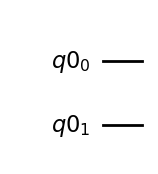

In [3]:
display(qc.draw("mpl"))

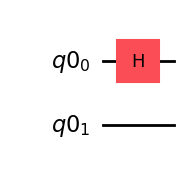

In [4]:
qc.h(0)
display(qc.draw("mpl"))

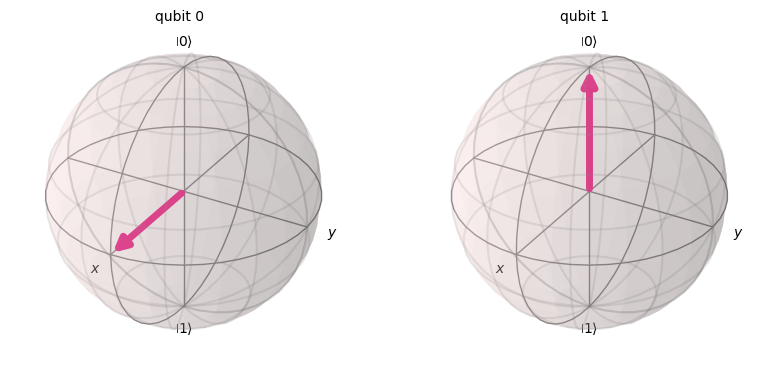

In [7]:
display(plot_bloch_multivector(qc))

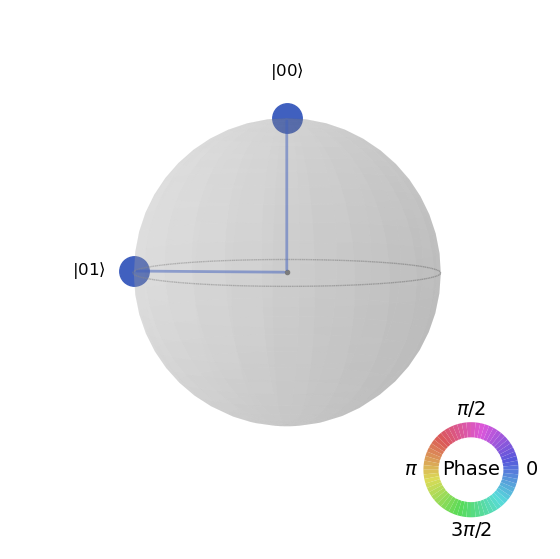

In [8]:
from qiskit.visualization import plot_state_qsphere

display(plot_state_qsphere(qc))

initialize a qubit at a random state

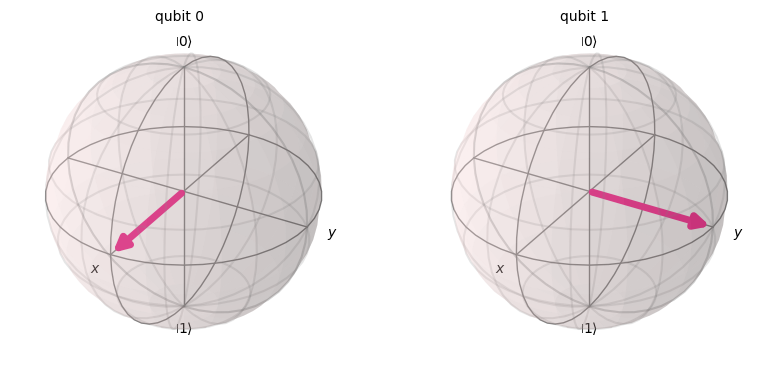

In [7]:
qc.initialize([1/np.sqrt(2), 1j/np.sqrt(2)],1)
display(plot_bloch_multivector(qc))

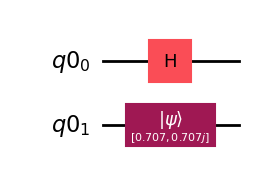

In [11]:
display(qc.draw("mpl"))

In [12]:
qc.measure_all()

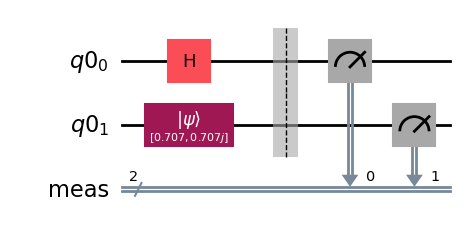

In [13]:
display(qc.draw("mpl"))

Run the circuit in the simulator

In [14]:
from qiskit_aer import AerSimulator
from qiskit import transpile

backend = AerSimulator()
transpiler = transpile(qc,backend)
job = backend.run(qc)

results = job.result().get_counts()




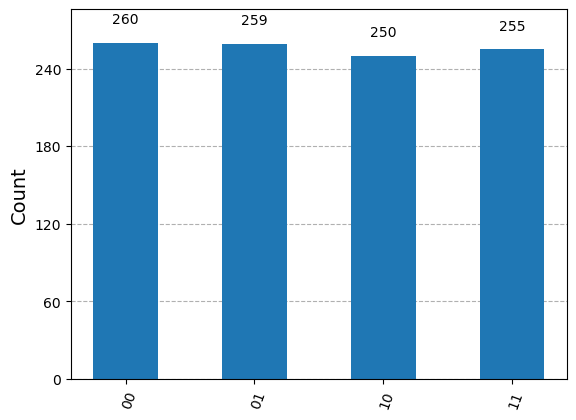

In [15]:
plot_histogram(results)

Print the matrix of any gate

In [16]:
from qiskit.circuit.library import HGate

hgate  = HGate()
matrix = hgate.to_matrix()

print(matrix)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


There are more gates like H - such as sx, sxdg, cx ,ccx , pauli gates etc

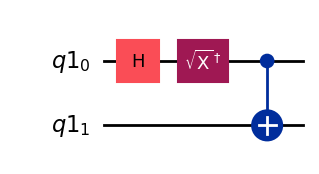

In [8]:

a = QuantumRegister(2)
qc2 = QuantumCircuit(a)
qc2.h(0)
qc2.sxdg(0)
qc2.cx(0,1)
display(qc2.draw("mpl"))

In [19]:
from sympy import *
from sympy.physics.quantum import TensorProduct

id = Matrix([[1,0],[0,1]])
x = Matrix([[0,1],[1,0]]) 
zero = Matrix([[1,0],[0,0]])
one = Matrix([[0,0],[0,1]])


Building H gate from matrix and formula

hgate  =  I * |0><0| + X * |1><1|

In [20]:
ccx2 =  TensorProduct(id, zero) + TensorProduct(x, one)

ccx2

Matrix([
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, 1, 0, 0]])

In [21]:
a = QuantumRegister(2)
qc3 = QuantumCircuit(a)
qc3.h(0)

Use the UnitaryGate function to convert any marix into a gate

In [22]:
from qiskit.circuit.library import UnitaryGate

ccx2 = UnitaryGate(ccx2)

In [23]:
qc3.append(ccx2,[0,1])

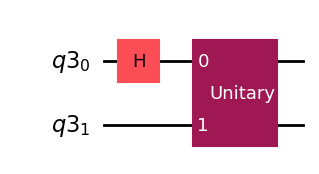

In [24]:
display(qc3.draw("mpl"))

In [25]:
qc2.measure_all()
qc3.measure_all()

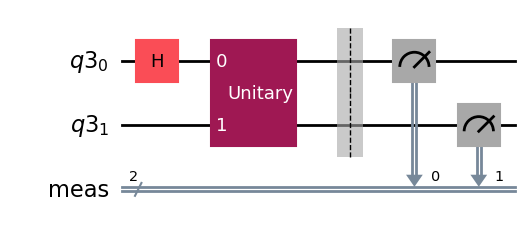

In [26]:
display(qc3.draw("mpl"))

Transpiler is Qiskit mecahnism that incorporates the circuit accordind to the instruction set architecture of the backend 

In [27]:
transpiler = transpile(qc2,backend)
job2 = backend.run(qc2)

results2 = job2.result().get_counts()

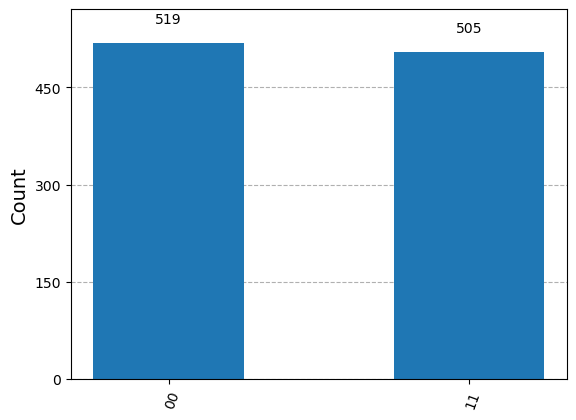

In [28]:
plot_histogram(results2)

In [29]:
transpiler = transpile(qc3,backend)
job3 = backend.run(qc3)

results3 = job3.result().get_counts()

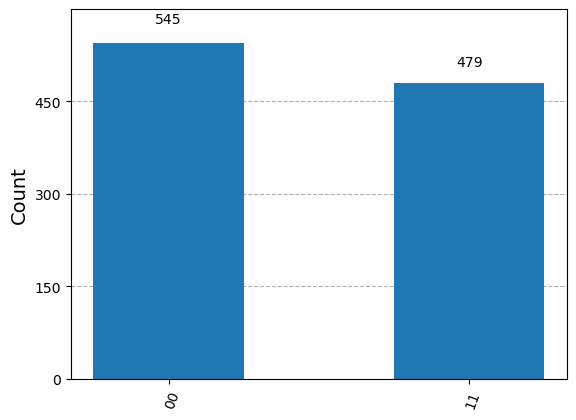

In [30]:
plot_histogram(results3)

two consecutive gates are expressed as matrix multiplication

and to match the size of the matrix we hace to tensorproduct id matrix accordingly

In [33]:
cx2 = TensorProduct(id, zero) + TensorProduct(x, one)
hcx = TensorProduct( id, Matrix([[ 0.70710678+0.j, 0.70710678+0.j],[ 0.70710678+0.j, -0.70710678+0.j]])) * cx2
hcx2 = UnitaryGate(hcx)


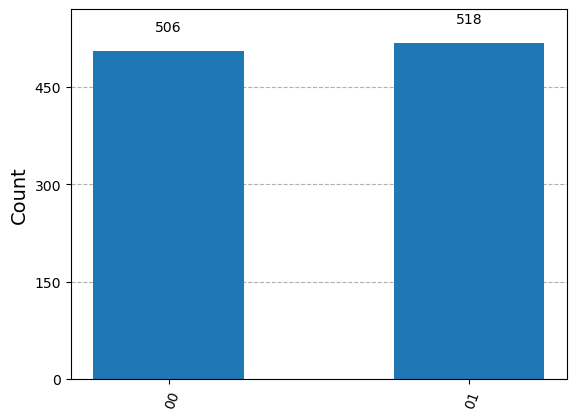

In [34]:
a = QuantumRegister(2)
qc4 = QuantumCircuit(a)
qc4.append(hcx2,[0,1])
qc4.measure_all()
transpiler = transpile(qc4,backend)
job4 = backend.run(qc4)

results4 = job4.result().get_counts()
plot_histogram(results4)


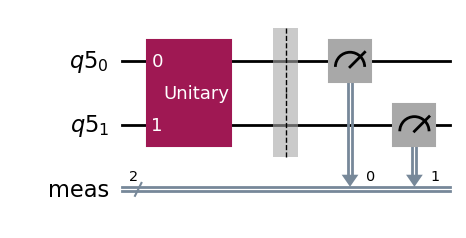

In [35]:
display(qc4.draw("mpl"))

Run circuit in real ibm qpu

you can get your token when you log into your ibm account. the follwoing token is fake

In [39]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

service =  QiskitRuntimeService(channel= "ibm_quantum", token = "fab9ce31f60f712f2dd2bace4fff9b4088f1db6679ba1046810221bdeafcea9731fbd95")

Estimator is a qiskit primitive that calculates expected value of a circuit in respect to a Operator 

In [42]:
backend  = service.least_busy()
estimator = Estimator(mode= backend) 
c = ClassicalRegister(2)
qc5 = QuantumCircuit(3,2)

qc5.h(0)

qc5.sx(1)

qc5.ccx(0,1,2)



NameError: name 'Estimator' is not defined

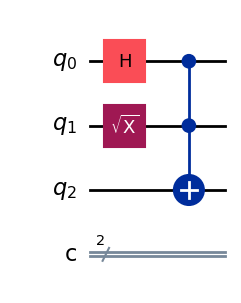

In [45]:
qc5 = QuantumCircuit(3,2)

qc5.h(0)

qc5.sx(1)

qc5.ccx(0,1,2)

display(qc5.draw("mpl"))

In [43]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
estimator = Estimator(mode= backend) 

Expected value of state si in respect to pauli operator Z = < si | Z | si >

In [46]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp

z = SparsePauliOp("Z"*3)

pm = generate_preset_pass_manager( optimization_level=1, backend=backend)
opcirc = pm.run(qc5)
obs = z.apply_layout(opcirc.layout)

job5  = estimator.run([(opcirc, obs)])

print(f"job id : {job5.job_id()}")s
print(f"job id : {job5.status()}")



job id : cwd7jsv40e00008ja8fg
job id : QUEUED
